# Analisis de bases de datos de comentarios en redes sociales

Glosario de contenido

1.importar librerias

2.habilitar la fuente de datos

2-1.definir la base de datos

2-2.revisar atributo de la base de datos (buscar nulos, tipos de datos, nombre de las columnas, id duplicadas, preview del data set)

2.3.revisar los 10 valores mas grandes de una categoria y revisar el sentimiento predonominante

2.4.revisar valores estadisticos de los datos como el promedio, desviacion estandar y creacion de las bases de datos separadas por setimiento de los comentarios

3.creacion de graficas

3.1.creacion de los histogramas

3.2.calculo de la matriz de correlacion

3.3.creacion de graficas de barras

3.4.graficas de tipo scatter

3.5.creacion de graficas de distribucion de comentarios por mes de publicacion

3.6.graficas de dispersion

3.7.calculo y creacion de las graficas de distancias, de acuerdo a los sentimientos de los comentarios

3.8.grafica tipo count plot para sentimientos en comentarios

4.analisis y procesamiento del texto

4.1.identificacion de las palabras, conteo y graficar la frecuencia de las mas repetidas

5.creacion de modelos de prediccion

5.1.predicion por medio de regresion logistica

5.2.creacion de modelos de prediccion de naivebayes

5.3.tokenizacion lematizacion del texto

5.4.eliminar stopwords de los comentarios

5.5.clasificacion de naivebayes sin stopwords

5.6.metodos de clasificacion alternativos

1. importar librerias

In [ ]:
# en esta seccion se importan algunas de la librerias necesarias para poder compilar el coldigo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
#
#lematizar con spacy


In [ ]:
# importa una libreria para poder ejecutar el codigo sin interrupciones

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# en esta seccion se importan algunas de la librerias necesarias para poder compilar el coldigo

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# en esta seccion se importan algunas de la librerias necesarias para poder compilar el coldigo
import numpy as np

In [ ]:
# en esta seccion se importan algunas de la librerias necesarias para poder compilar el coldigo
from datetime import datetime

2. habilitar la fuente de la base de datos

In [ ]:
# pide permiso para tener acceso al contenido de google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.1 definir la base de datos

In [ ]:
# carga la informacion del data set y lo guarda en la variable df

path = 'drive/MyDrive/synthetic_social_media_data.csv'
df = pd.read_csv(path)

2.2 revisar atributo de la base de datos (buscar nulos, tipos de datos, nombre de las columnas, id duplicadas, preview del data set)

In [ ]:
# se realiza el conteo de valores nulos en todas las columnas y se imprime el valor
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

Post ID                0
Post Content           0
Sentiment Label        0
Number of Likes        0
Number of Shares       0
Number of Comments     0
User Follower Count    0
Post Date and Time     0
Post Type              0
Language               0
dtype: int64


In [ ]:
# se presenta una preview del data set para poder las columna que conforman el dataset y tener una idea de que tipo de informacion hay en cada una de ellas

print("Dataset Preview:")
df.head()

Dataset Preview:


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [ ]:
# se busca si existen id duplicadas en la primera columna del data set con el fin de saber si estas son unicas, o existen multiples comentarios de una cuenta

df['Post ID'].duplicated().sum()


0

In [ ]:
# se calcula el promedio del numero de comentarios en el data set como respuestas
average_commnents = df['Number of Comments'].mean()
print(f"el promedio del numero de likes en este conjunto de datos es: {average_commnents}")


el promedio del numero de likes en este conjunto de datos es: 102.805


2.3  revisar los 10 valores mas grandes de una categoria y revisar el sentimiento predonominante

In [ ]:
# se crea un filtro del data set para poder mostar los 10 usuarios con la mayor cantidad de seguidores en orden descendente

top_10_sorted = df.sort_values(by='User Follower Count', ascending=False).head(10)
print(top_10_sorted)

                                   Post ID  \
1020  4f454bf8-2bab-4840-a72b-1ddf7dc27ed1   
841   450fe806-d877-495a-9b0b-ab5267ea8b05   
456   a1bd2e87-04bb-4ca9-9cc0-7ffb1072a042   
1272  6c344342-daac-412f-b79d-f5ed46711fc4   
443   6ffca360-a40d-40fb-82f6-b0f0c4eb82cb   
1549  5365cdbc-71ef-4c1e-9c96-a57b09d9f115   
369   951f5c48-28a7-4ff9-9bd4-e1fc1a86aaea   
271   5a4ae604-1d8f-4794-bdae-614354c06a85   
526   68882955-9748-423a-aade-357916c81d3e   
230   dbf871de-c393-4741-be58-7cf42d22254f   

                                           Post Content Sentiment Label  \
1020  Civil eye long check environmental three conta...        Positive   
841   Receive order less option. Member knowledge he...        Positive   
456   Collection really thought this through show di...        Positive   
1272  Need matter east now but. Degree measure such ...         Neutral   
443   Culture agency friend moment instead. Time hum...        Positive   
1549  Position away work team usually. Trai

In [ ]:
# se realiza un conteo del conjunto que se filtro anteriormente para poder observar que sentimiento se repitio en mayor cantidad

sentiment_counts = top_10_sorted['Sentiment Label'].value_counts()
print(sentiment_counts)


Sentiment Label
Positive    7
Neutral     2
Negative    1
Name: count, dtype: int64


In [ ]:
# se crea un filtro del data set para poder mostar los 10 usuarios con la mayor cantidad de likes por comentario en orden descendente

top_10_likes = df.sort_values(by='Number of Likes', ascending=False).head(10)
print(top_10_likes)

                                   Post ID  \
1554  d33f8eed-d482-4fbe-8838-0f988426090b   
1619  1193ddea-41da-410d-9cdc-e7bf3408561a   
598   aa292b69-df09-439f-bcce-faf55b5699af   
700   f1b32616-6b8b-4ae5-848a-1d2347cb8aef   
181   d7f961ff-c9e1-4d68-9f8d-4120f1794848   
1834  60aead5d-7c2b-4e11-b26e-827cec2784e9   
1685  12a57fd5-5354-4a87-bc0c-6b758583d38a   
281   5bb8f06c-455d-42ab-9328-7a73c3731d07   
1621  e9ce4b21-d482-41e2-a08b-8f3e77732ceb   
858   81eb352f-acc4-41c2-9214-0e5b58d0a654   

                                           Post Content Sentiment Label  \
1554  Scientist message act carry matter country. Mu...        Positive   
1619  Event rise group later. Leg news feeling. Sout...        Negative   
598   Style image language rise. Improve example acr...         Neutral   
700   Late kid range. Site election fine moment valu...        Positive   
181   Experience exist give. If ability just money.\...        Negative   
1834  Less father environment thing read. I

In [ ]:
# se realiza un conteo del conjunto que se filtro anteriormente para poder observar que sentimiento se repitio en mayor cantidad

sentiment_counts = top_10_likes['Sentiment Label'].value_counts()
print(sentiment_counts)

Sentiment Label
Neutral     4
Positive    3
Negative    3
Name: count, dtype: int64


2.4 revisar valores estadisticos de los datos como el promedio, desviacion estandar y creacion de las bases de datos separadas por setimiento de los comentarios

In [ ]:
# se filtra el set para poder observar un conjunto de usuarios con una gran cantidad de seguidores y likes por comentario
set_de_rango = df[(df['User Follower Count'] >= 6000) & (df['Number of Likes'] >= 400)]

In [ ]:
#  se imprime el promedio del numero de comentarios de este data set

average_comments = set_de_rango['Number of Comments'].mean()
print(f"el promedio del numero de comentarios en este conjunto de datos es: {average_comments}")


el promedio del numero de comentarios en este conjunto de datos es: 100.9874739039666


In [ ]:
# se generan tres data sets cada uno conteniendo datos correspondientes a una categoria de comentario

datos_negativos = df[df['Sentiment Label'] == "Negative"]
datos_positivos = df[df['Sentiment Label'] == "Positive"]
datos_neutrales = df[df['Sentiment Label'] == "Neutral"]

In [ ]:
# imprime la media de los valores del numero de like, shares, comentario y seguidores del dataset de comentarios neutrales

media_columna_likes = datos_neutrales['Number of Likes'].mean()
print("Media de la columna 'Number of Likes':", media_columna_likes)
media_columna_Shares = datos_neutrales['Number of Shares'].mean()
print("Media de la columna 'Number of Shares':", media_columna_Shares)
media_columna_Comments = datos_neutrales['Number of Comments'].mean()
print("Media de la columna 'Number of Comments':", media_columna_Comments)
media_columna_follower = datos_neutrales['User Follower Count'].mean()
print("Media de la columna 'User Follower Count':", media_columna_follower)

Media de la columna 'Number of Likes': 488.3973607038123
Media de la columna 'Number of Shares': 251.9633431085044
Media de la columna 'Number of Comments': 105.33284457478005
Media de la columna 'User Follower Count': 5166.975073313783


In [ ]:
# imprime la media de los valores del numero de like, shares, comentario y seguidores del dataset de comentarios negativos

media_columna_likes = datos_negativos['Number of Likes'].mean()
print("Media de la columna 'Number of Likes':", media_columna_likes)
media_columna_Shares = datos_negativos['Number of Shares'].mean()
print("Media de la columna 'Number of Shares':", media_columna_Shares)
media_columna_Comments = datos_negativos['Number of Comments'].mean()
print("Media de la columna 'Number of Comments':", media_columna_Comments)
media_columna_follower = datos_negativos['User Follower Count'].mean()
print("Media de la columna 'User Follower Count':", media_columna_follower)

Media de la columna 'Number of Likes': 532.3362962962963
Media de la columna 'Number of Shares': 252.97037037037038
Media de la columna 'Number of Comments': 99.74962962962962
Media de la columna 'User Follower Count': 5003.666666666667


In [ ]:
# imprime la media de los valores del numero de like, shares, comentario y seguidores del dataset de comentarios positivos

media_columna_likes = datos_positivos['Number of Likes'].mean()
print("Media de la columna 'Number of Likes':", media_columna_likes)
media_columna_Shares = datos_positivos['Number of Shares'].mean()
print("Media de la columna 'Number of Shares':", media_columna_Shares)
media_columna_Comments = datos_positivos['Number of Comments'].mean()
print("Media de la columna 'Number of Comments':", media_columna_Comments)
media_columna_follower = datos_positivos['User Follower Count'].mean()
print("Media de la columna 'User Follower Count':", media_columna_follower)

Media de la columna 'Number of Likes': 488.8709175738725
Media de la columna 'Number of Shares': 240.08709175738724
Media de la columna 'Number of Comments': 103.3312597200622
Media de la columna 'User Follower Count': 4837.017107309487


In [ ]:
# imprime informacion del dataset como el tipo de variable por columna y los nombres de las columnas

print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
None


In [ ]:
# se calcula la desviacion standar del numero de likes, comentarios, shares y seguidores

desviacion_estandar = np.std(df['Number of Likes'])
desviacion_estandar2 = np.std(df['Number of Comments'])
desviacion_estandar3 = np.std(df['Number of Shares'])
desviacion_estandar4 = np.std(df['User Follower Count'])
print("Desviación estándar de la columna 'Number of Likes':", desviacion_estandar)
print("Desviación estándar de la columna 'Number of Comments':", desviacion_estandar2)
print("Desviación estándar de la columna 'Number of Shares':", desviacion_estandar3)
print("Desviación estándar de la columna 'User Follower Count':", desviacion_estandar4)

Desviación estándar de la columna 'Number of Likes': 283.14005431764673
Desviación estándar de la columna 'Number of Comments': 58.01837618375746
Desviación estándar de la columna 'Number of Shares': 145.05871147573308
Desviación estándar de la columna 'User Follower Count': 2913.13669628993


3. creacion de las graficas

3.1 creacion de los histogramas

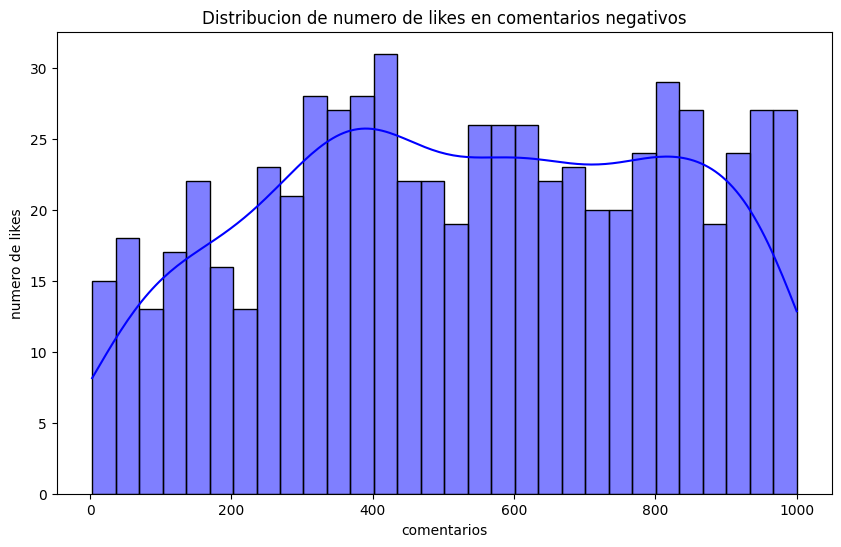

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios negativos
plt.figure(figsize=(10, 6))
sns.histplot(datos_negativos['Number of Likes'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de likes en comentarios negativos')
plt.xlabel('numero de likes')
plt.show()

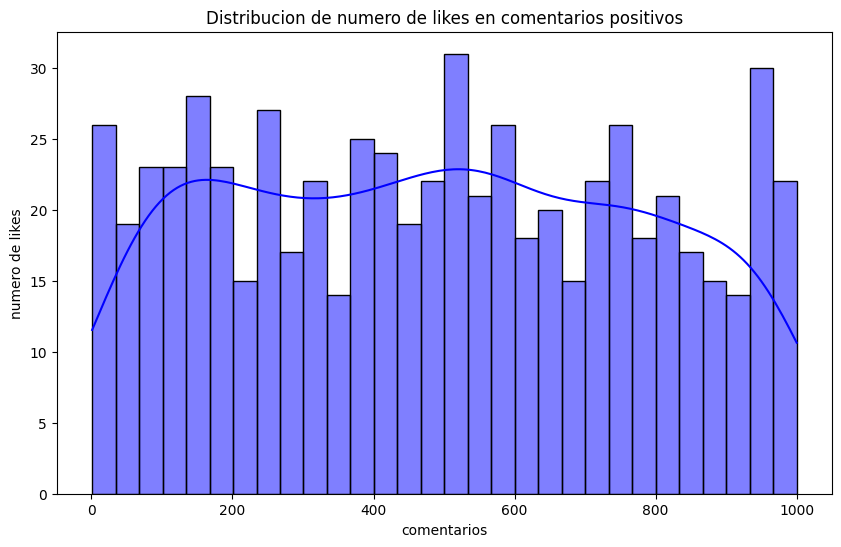

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios positivos
plt.figure(figsize=(10, 6))
sns.histplot(datos_positivos['Number of Likes'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de likes en comentarios positivos')
plt.xlabel('numero de likes')
plt.show()

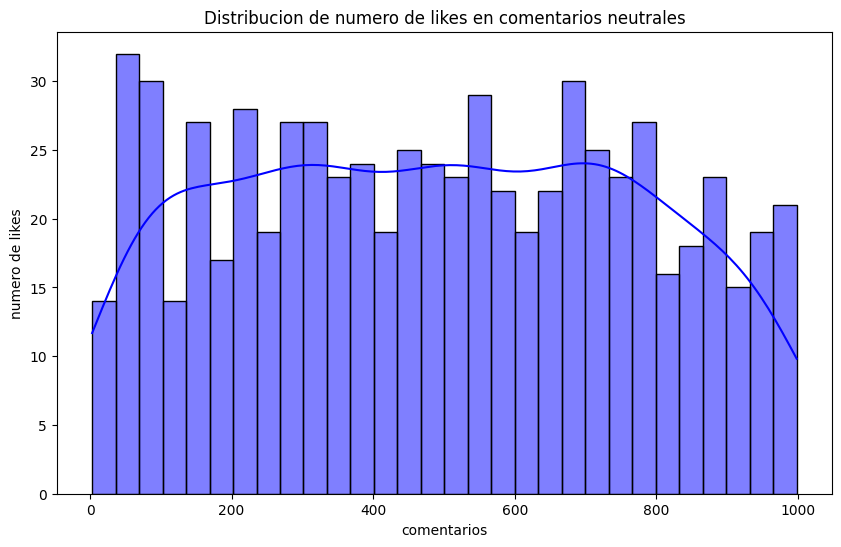

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios neutrales
plt.figure(figsize=(10, 6))
sns.histplot(datos_neutrales['Number of Likes'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de likes en comentarios neutrales')
plt.xlabel('numero de likes')
plt.show()

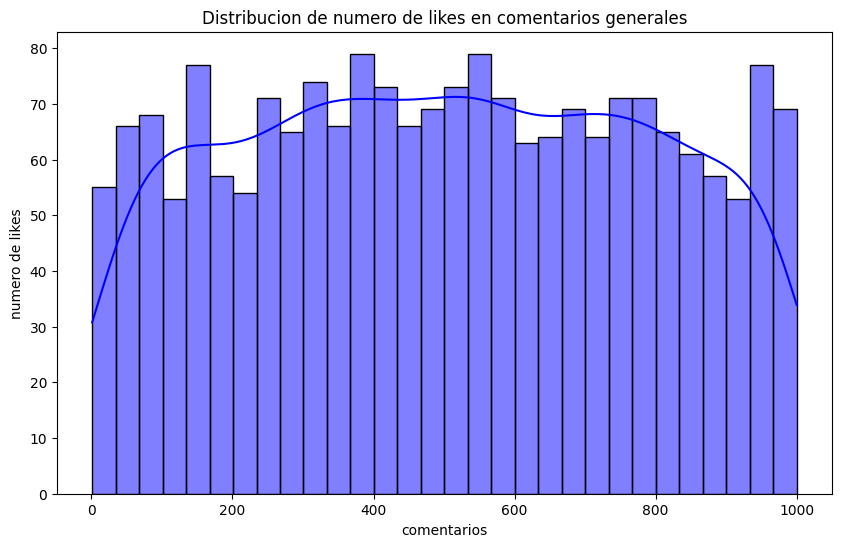

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios generales
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Likes'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de likes en comentarios generales')
plt.xlabel('numero de likes')
plt.show()

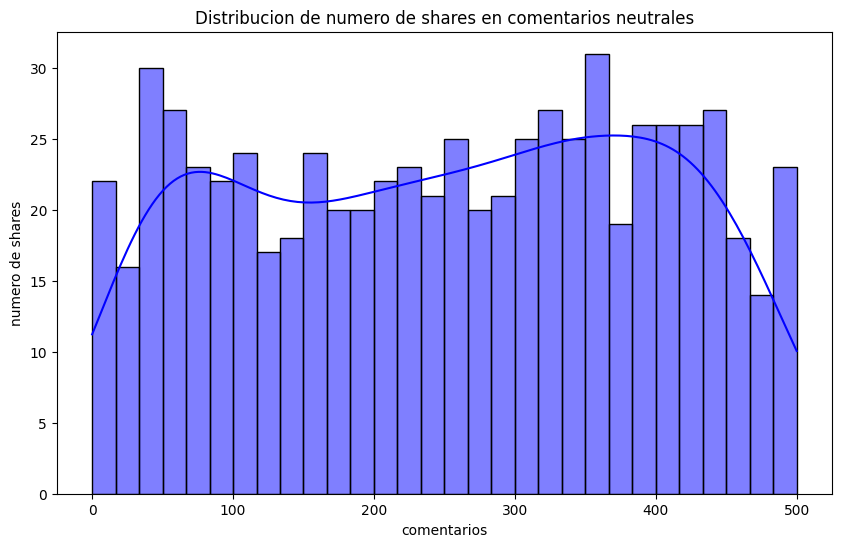

In [ ]:
# se grafica el histograma de los numeros de shares de los comentarios neutrales
plt.figure(figsize=(10, 6))
sns.histplot(datos_neutrales['Number of Shares'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de shares en comentarios neutrales')
plt.xlabel('numero de shares')
plt.show()

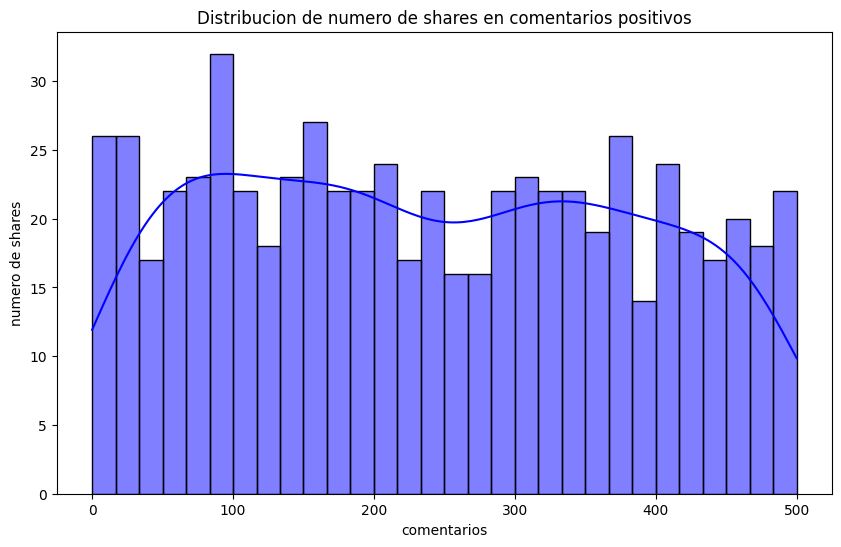

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios positivos
plt.figure(figsize=(10, 6))
sns.histplot(datos_positivos['Number of Shares'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de shares en comentarios positivos')
plt.xlabel('numero de shares')
plt.show()

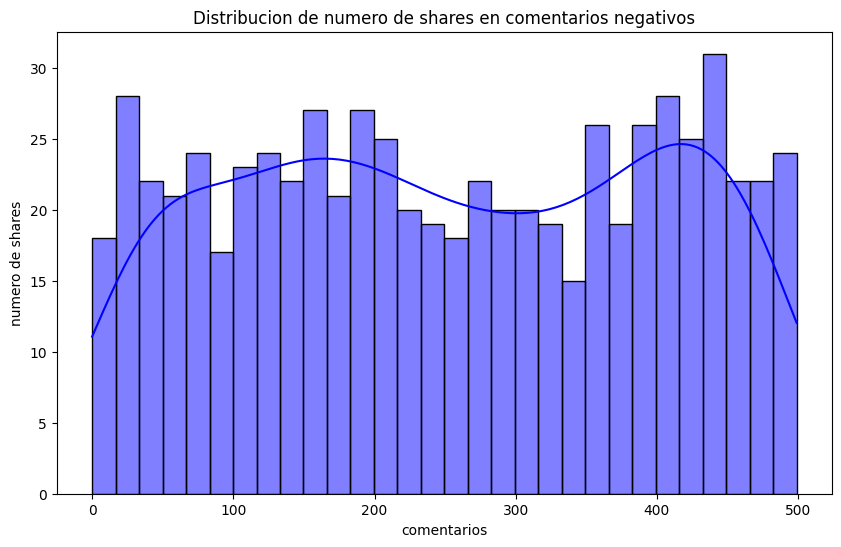

In [ ]:
# se grafica el histograma de los numeros de shares de los comentarios negativos
plt.figure(figsize=(10, 6))
sns.histplot(datos_negativos['Number of Shares'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de shares en comentarios negativos')
plt.xlabel('numero de shares')
plt.show()

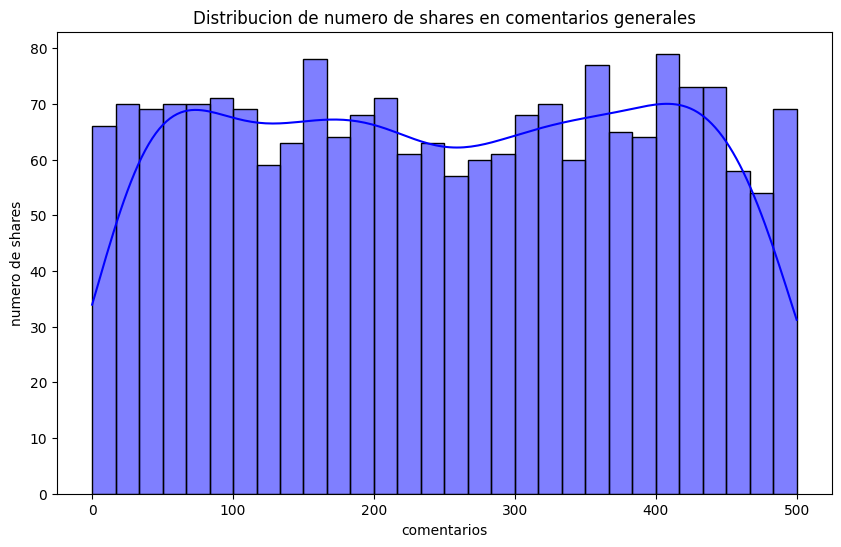

In [ ]:
# se grafica el histograma de los numeros de likes de los comentarios generales
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Shares'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de shares en comentarios generales')
plt.xlabel('numero de shares')
plt.show()

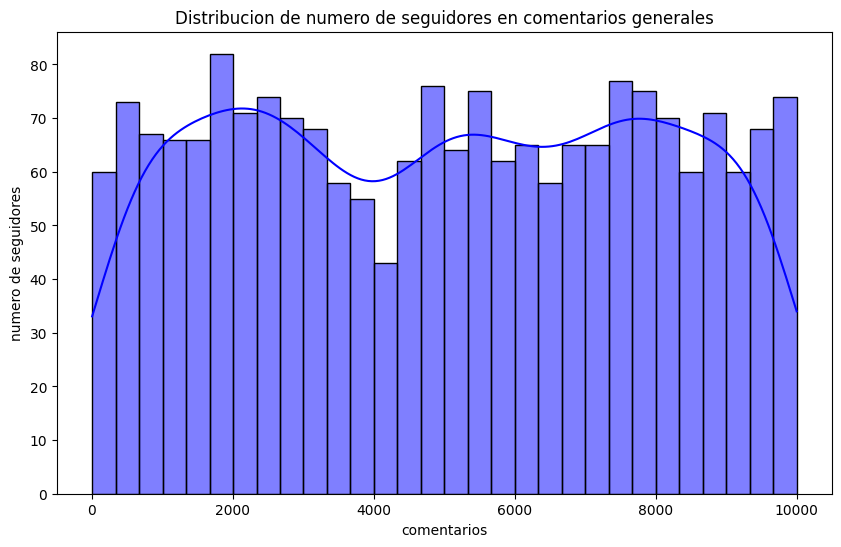

In [ ]:
# se grafica el histograma de los numeros de seguidores de los comentarios generales
plt.figure(figsize=(10, 6))
sns.histplot(df['User Follower Count'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de seguidores en comentarios generales')
plt.xlabel('numero de seguidores')
plt.show()

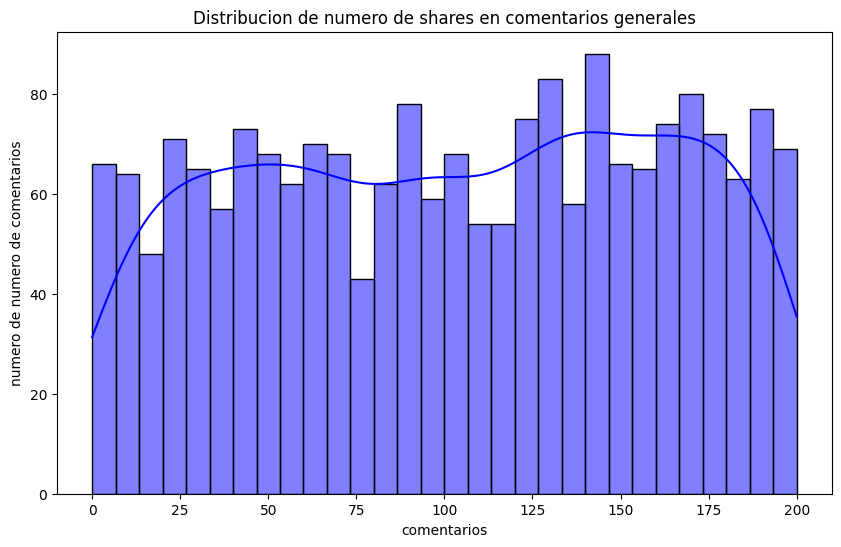

In [ ]:
# se grafica el histograma de los numeros de shares de los comentarios generales
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Comments'], bins=30, kde=True, color='blue')
plt.title('Distribucion de numero de shares en comentarios generales')
plt.xlabel('numero de comentarios')
plt.show()

3.2 calculo de la matriz de correlacion

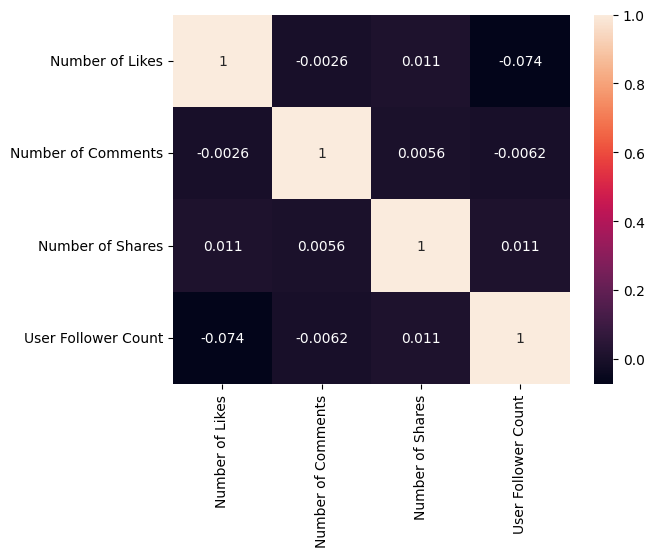

In [ ]:
# Calcular la matriz de correlación del data set de comentarios positivos, con el fin de saber la influencias que tiene una columna sobre otra.
# para ello se crea el set llamado nuevo_set que solo contiene las columnas con datos de tipo int64
nuevo_set = datos_positivos[['Number of Likes', 'Number of Comments', 'Number of Shares', 'User Follower Count']]
correlacion = nuevo_set.corr()
#print(correlacion)
sns.heatmap(correlacion, annot = True)
plt.show()

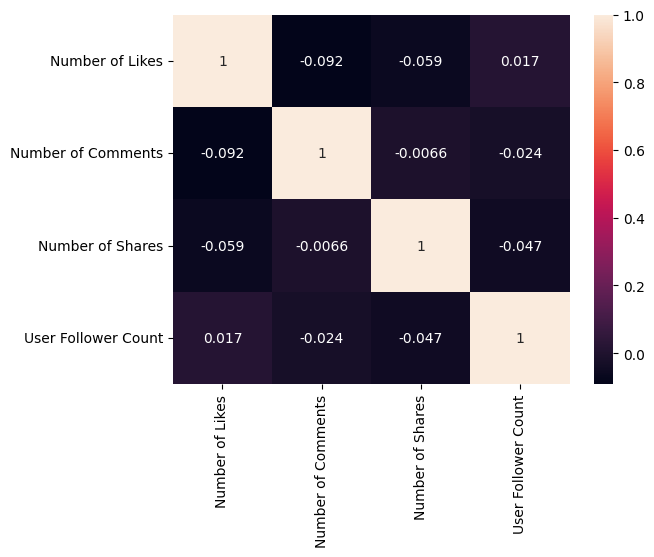

In [ ]:
# Calcular la matriz de correlación del data set de comentarios negativos, con el fin de saber la influencias que tiene una columna sobre otra.
# para ello se crea el set llamado nuevo_set que solo contiene las columnas con datos de tipo int64
nuevo_set = datos_negativos[['Number of Likes', 'Number of Comments', 'Number of Shares', 'User Follower Count']]
correlacion = nuevo_set.corr()
#print(correlacion)
sns.heatmap(correlacion, annot = True)
plt.show()

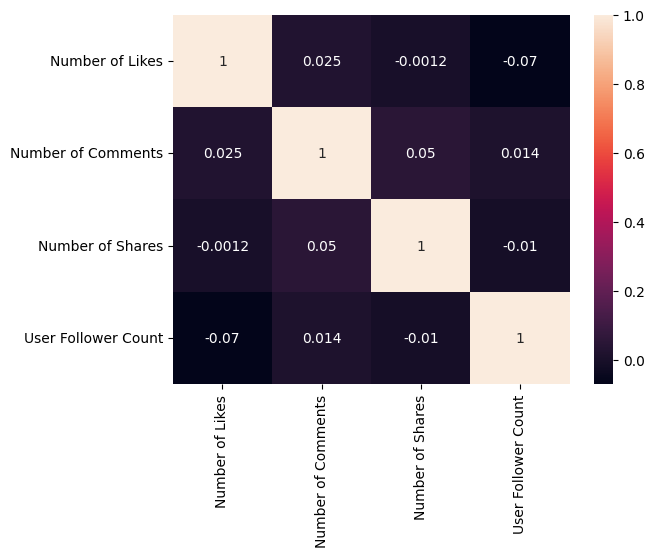

In [ ]:
# Calcular la matriz de correlación del data set de comentarios neutrales, con el fin de saber la influencias que tiene una columna sobre otra.
# para ello se crea el set llamado nuevo_set que solo contiene las columnas con datos de tipo int64
nuevo_set = datos_neutrales[['Number of Likes', 'Number of Comments', 'Number of Shares', 'User Follower Count']]
correlacion = nuevo_set.corr()
#print(correlacion)
sns.heatmap(correlacion, annot = True)
plt.show()

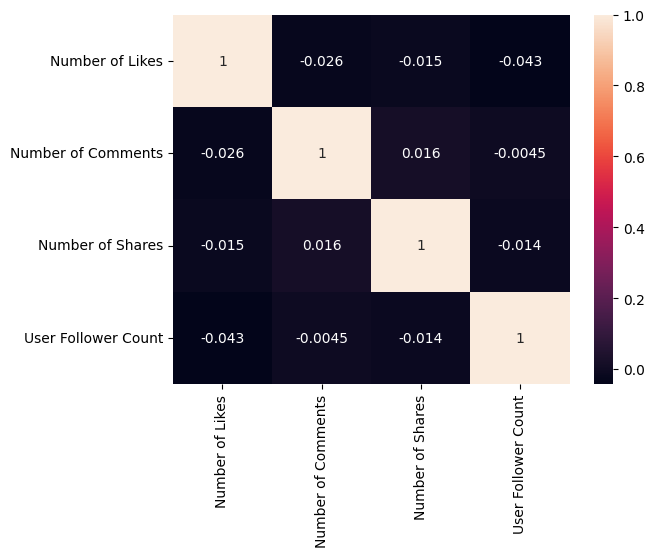

In [ ]:
# Calcular la matriz de correlación del data set de comentarios generales, con el fin de saber la influencias que tiene una columna sobre otra.
# para ello se crea el set llamado nuevo_set que solo contiene las columnas con datos de tipo int64
nuevo_set = df[['Number of Likes', 'Number of Comments', 'Number of Shares', 'User Follower Count']]
correlacion = nuevo_set.corr()
#print(correlacion)
sns.heatmap(correlacion, annot = True)
plt.show()

3.3 creacion de graficas de barras

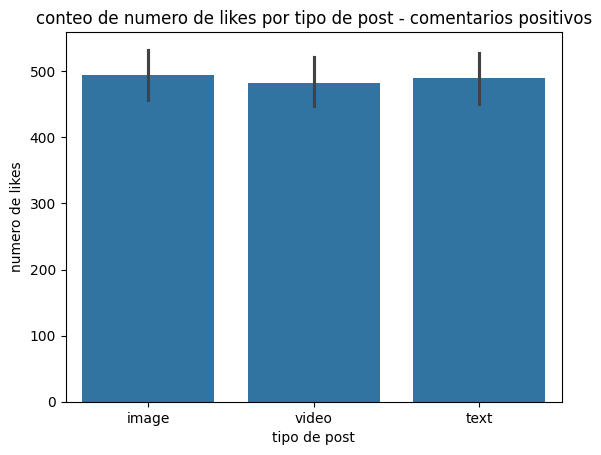

In [ ]:
# genera una grafica de barras del data set de comentarios positivos para conocer que tipo de formato de pots tiene el mayor numero de likes.

sns.barplot(x=datos_positivos['Post Type'], y=datos_positivos['Number of Likes'], data=df)
plt.title('conteo de numero de likes por tipo de post - comentarios positivos')
plt.xlabel('tipo de post')
plt.ylabel('numero de likes')
plt.show()

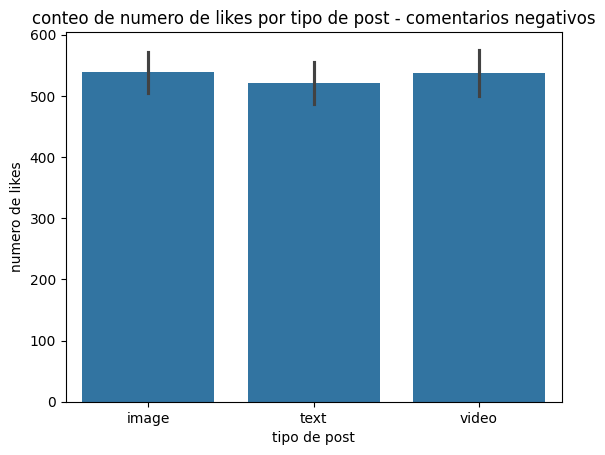

In [ ]:
# genera una grafica de barras del data set de comentarios negativos para conocer que tipo de formato de posts tiene el mayor numero de likes.

sns.barplot(x=datos_negativos['Post Type'], y=datos_negativos['Number of Likes'], data=df)
plt.title('conteo de numero de likes por tipo de post - comentarios negativos')
plt.xlabel('tipo de post')
plt.ylabel('numero de likes')
plt.show()

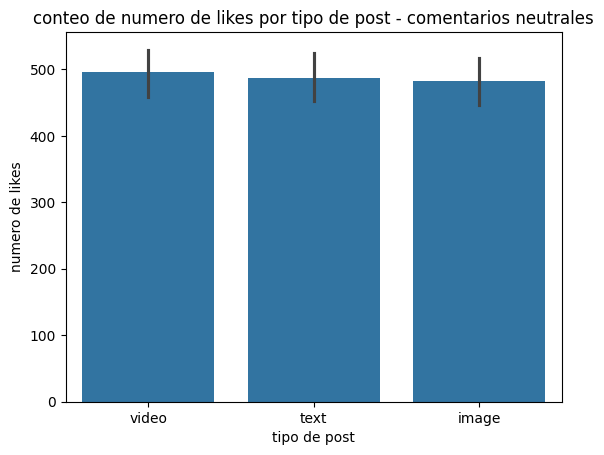

In [ ]:
# genera una grafica de barras del data set de comentarios neutraless para conocer que tipo de formato de posts tiene el mayor numero de likes.

sns.barplot(x=datos_neutrales['Post Type'], y=datos_neutrales['Number of Likes'], data=df)
plt.title('conteo de numero de likes por tipo de post - comentarios neutrales')
plt.xlabel('tipo de post')
plt.ylabel('numero de likes')
plt.show()

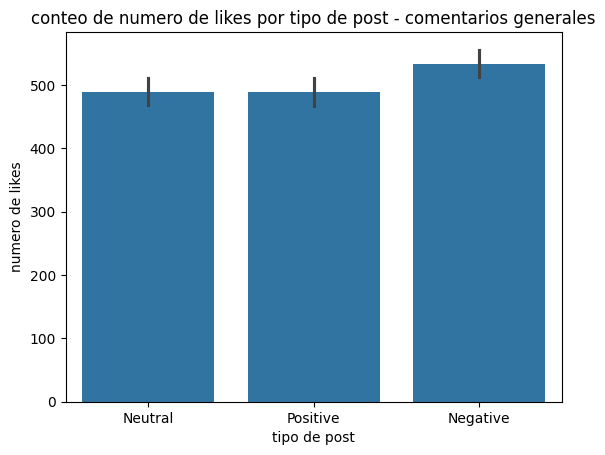

In [ ]:
# genera una grafica de barras del data set de comentarios generales para conocer que tipo de formato de posts tiene el mayor numero de likes.
sns.barplot(x=df['Sentiment Label'], y=df['Number of Likes'], data=df)
plt.title('conteo de numero de likes por tipo de post - comentarios generales')
plt.xlabel('tipo de post')
plt.ylabel('numero de likes')
plt.show()

3.4 graficas de tipo scatter

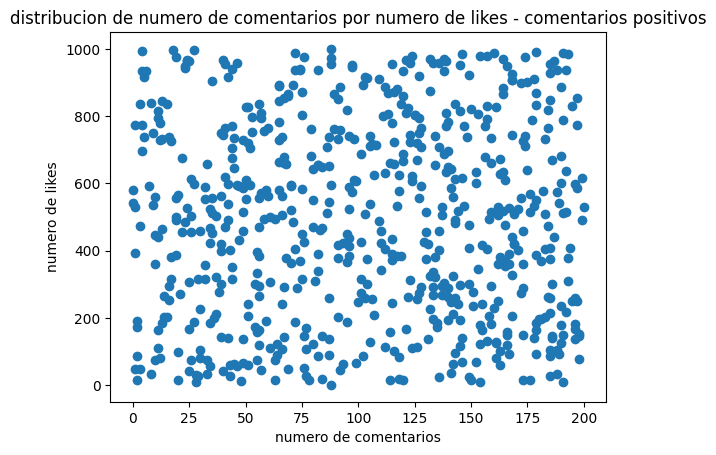

In [ ]:
# se realiza la grafica tipo scatter de los comentarios positivos, usando la columna de datos de los numeros de likes y el numero de comentarios. para tratar de detectar una tendencia o una aglomeracion de los datos

plt.scatter(x=datos_positivos['Number of Comments'], y=datos_positivos['Number of Likes'])
plt.title('distribucion de numero de comentarios por numero de likes - comentarios positivos')
plt.xlabel('numero de comentarios')
plt.ylabel('numero de likes')
plt.show()

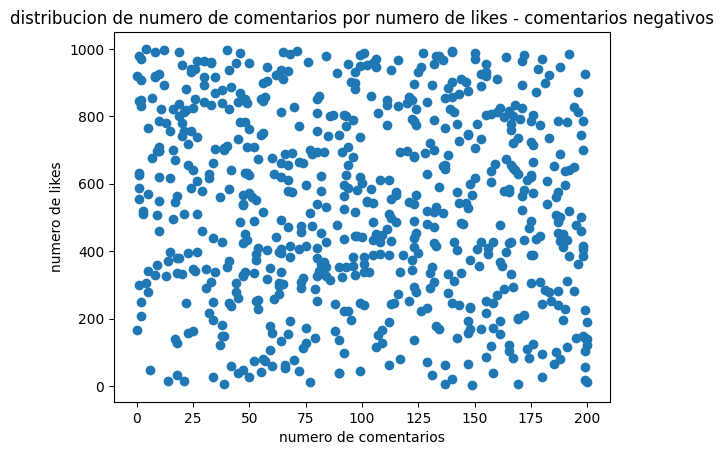

In [ ]:
# se realiza la grafica tipo scatter de los comentarios negativos, usando la columna de datos de los numeros de likes y el numero de comentarios. para tratar de detectar una tendencia o una aglomeracion de los datos

plt.scatter(x=datos_negativos['Number of Comments'], y=datos_negativos['Number of Likes'])
plt.title('distribucion de numero de comentarios por numero de likes - comentarios negativos')
plt.xlabel('numero de comentarios')
plt.ylabel('numero de likes')
plt.show()

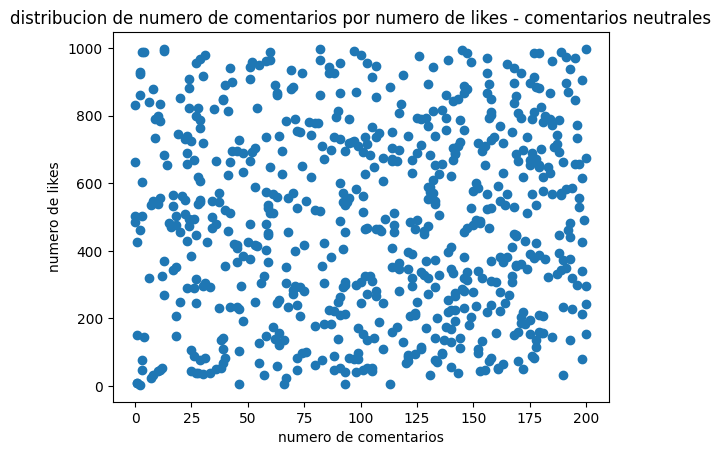

In [ ]:
# se realiza la grafica tipo scatter de los comentarios neutrales, usando la columna de datos de los numeros de likes y el numero de comentarios. para tratar de detectar una tendencia o una aglomeracion de los datos

plt.scatter(x=datos_neutrales['Number of Comments'], y=datos_neutrales['Number of Likes'])
plt.title('distribucion de numero de comentarios por numero de likes - comentarios neutrales')
plt.xlabel('numero de comentarios')
plt.ylabel('numero de likes')
plt.show()

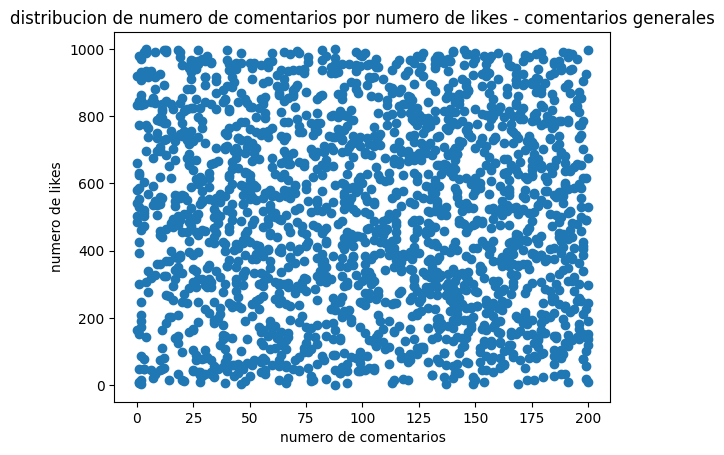

In [ ]:
# se realiza la grafica tipo scatter de los comentarios generales, usando la columna de datos de los numeros de likes y el numero de comentarios. para tratar de detectar una tendencia o una aglomeracion de los datos


plt.scatter(x=df['Number of Comments'], y=df['Number of Likes'])
plt.title('distribucion de numero de comentarios por numero de likes - comentarios generales')
plt.xlabel('numero de comentarios')
plt.ylabel('numero de likes')
plt.show()

3.5 creacion de graficas de distribucion de comentarios por mes de publicacion

In [ ]:
# se extraera la informacion de la columna "post date and time" separandola para poder filtrar la informacion por mes
# se reviso el dataset para observar el formato de la fecha, el cual era año, mes, dias, horas, minutos y segundos
# luego se define la funcion llamada extract_month() que recibe la variable x y regresa una variable para poder definir el mes



def extract_month(x):
    date = datetime.strptime(x, "%Y-%m-%d %H:%M:%S") # Changed the date format to match the data
    return date.month

months = ["January", "February", "March", "April",
         "May", "June", "July", "August",
          "September", "October", "November", "December"]

# se crea una nueva columna llamada month en el que se almacena una variable tipo entera correspondiente al mes en que se realizo el comentario

df["month"] = df["Post Date and Time"].apply(extract_month)


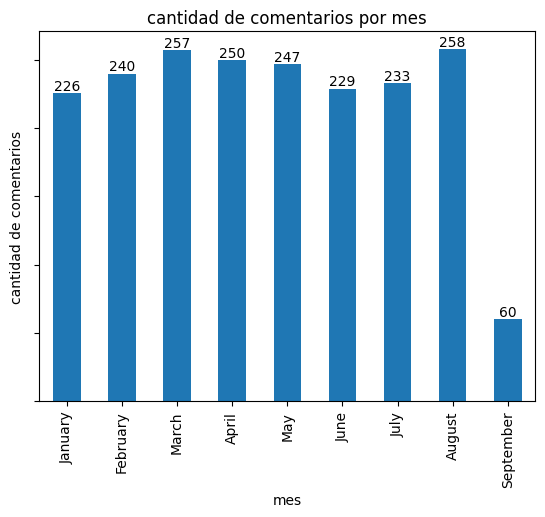

In [ ]:
# se realiza un conteo de los valores de la columna month para poder conocer que mes repite mas y se asigna los numeros correspondientes a el mes corespondiente de la lista months
# y se lo grafica para conocer la cantidad de comentarios por mes

count = df["month"].value_counts()
count = count.sort_index()
fig, axes = plt.subplots()
count.plot(kind="bar", ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels([months[i-1] for i in count.index])
axes.set_yticklabels(())
axes.set_ylabel("cantidad de comentarios")
axes.set_xlabel("mes")
axes.set_title("cantidad de comentarios por mes")


plt.show()

3.6 graficas de dispersion

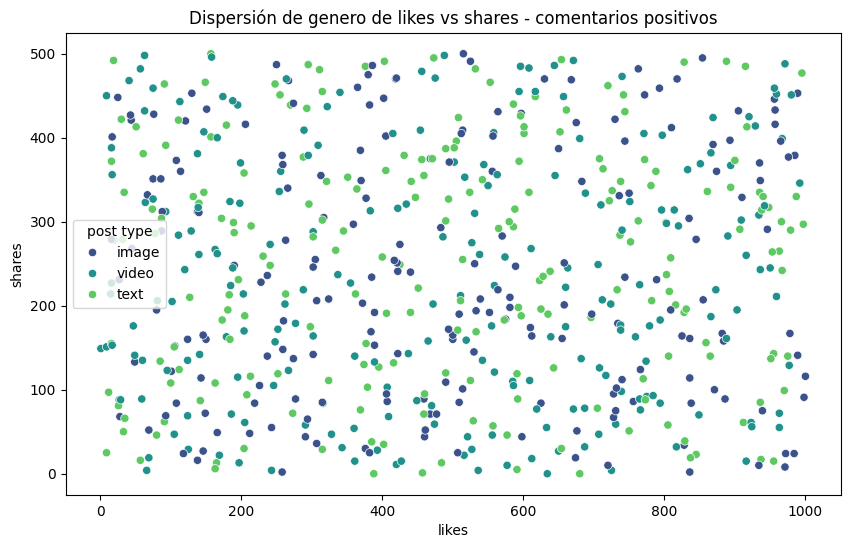

In [ ]:
# se genera un grafica tipo scatter plot para los datos de comentarios postivos. con los numeros de likes en el eje x, y en el eje y el numero de shares. para los tres tipos de posts y para poder distingirlos
# se les otorga la paleta de colores viridis

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x=datos_positivos['Number of Likes'], y=datos_positivos['Number of Shares'], hue=datos_positivos['Post Type'], palette='viridis')
plt.title('Dispersión de genero de likes vs shares - comentarios positivos')
plt.xlabel('likes')
plt.ylabel('shares')
plt.legend(title='post type')
plt.show()

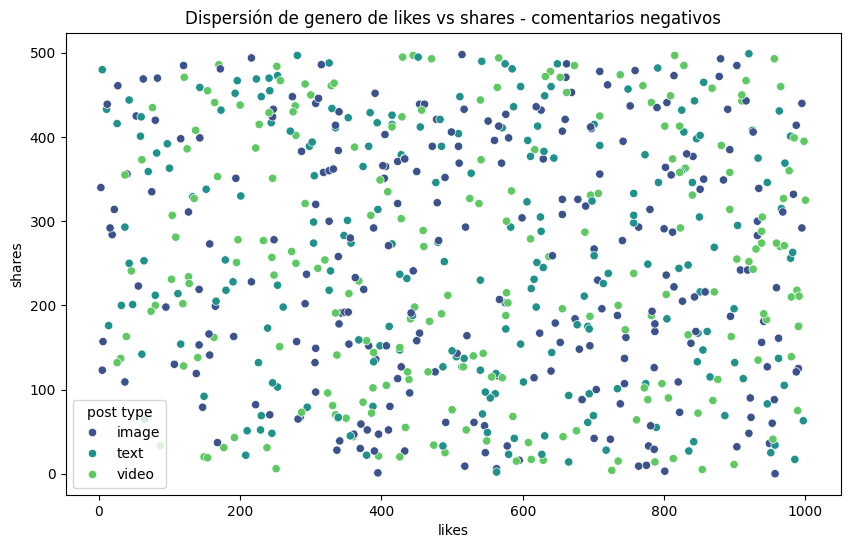

In [ ]:
# se genera un grafica tipo scatter plot para los datos de comentarios negativos. con los numeros de likes en el eje x, y en el eje y el numero de shares. para los tres tipos de posts y para poder distingirlos
# se les otorga la paleta de colores viridis

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x=datos_negativos['Number of Likes'], y=datos_negativos['Number of Shares'], hue=datos_negativos['Post Type'], palette='viridis')
plt.title('Dispersión de genero de likes vs shares - comentarios negativos')
plt.xlabel('likes')
plt.ylabel('shares')
plt.legend(title='post type')
plt.show()

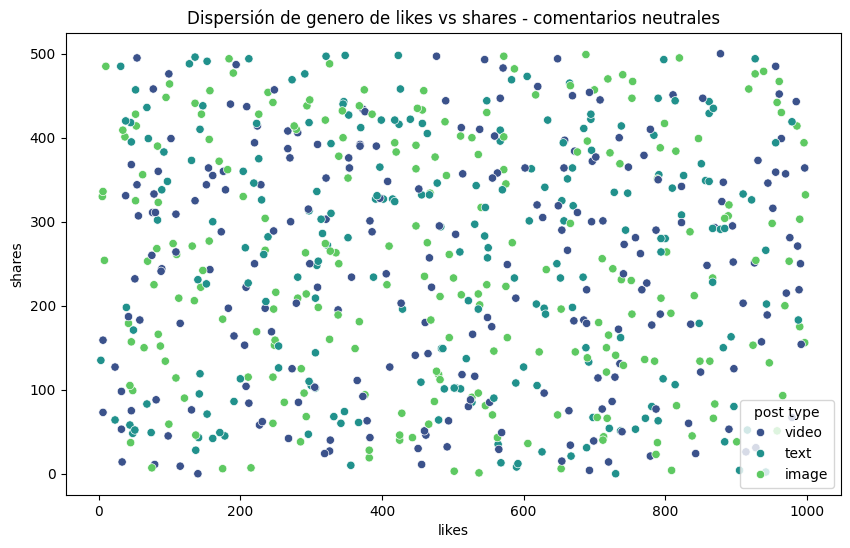

In [ ]:
# se genera un grafica tipo scatter plot para los datos de comentarios neutrales. con los numeros de likes en el eje x, y en el eje y el numero de shares. para los tres tipos de posts y para poder distingirlos
# se les otorga la paleta de colores viridis

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x=datos_neutrales['Number of Likes'], y=datos_neutrales['Number of Shares'], hue=datos_neutrales['Post Type'], palette='viridis')
plt.title('Dispersión de genero de likes vs shares - comentarios neutrales')
plt.xlabel('likes')
plt.ylabel('shares')
plt.legend(title='post type')
plt.show()

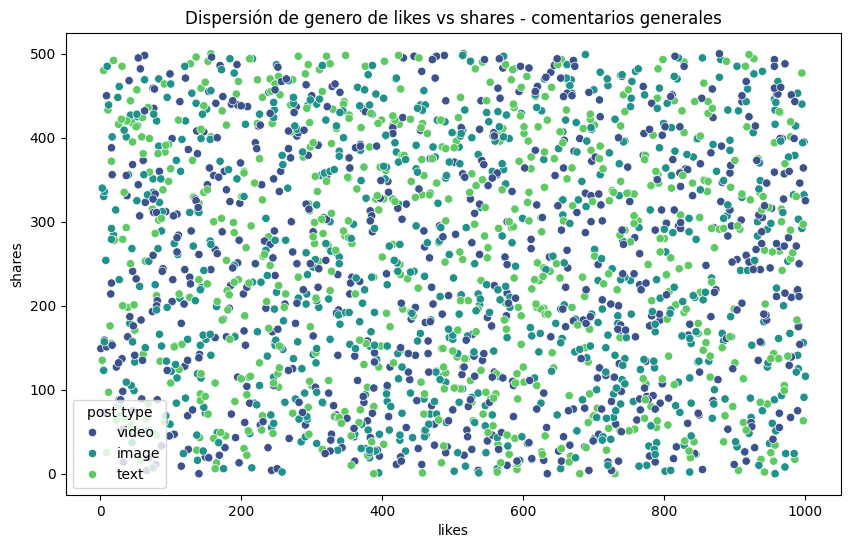

In [ ]:
# se genera un grafica tipo scatter plot para los datos de comentarios generales. con los numeros de likes en el eje x, y en el eje y el numero de shares. para los tres tipos de posts y para poder distingirlos
# se les otorga la paleta de colores viridis

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x=df['Number of Likes'], y=df['Number of Shares'], hue=df['Post Type'], palette='viridis')
plt.title('Dispersión de genero de likes vs shares - comentarios generales')
plt.xlabel('likes')
plt.ylabel('shares')
plt.legend(title='post type')
plt.show()


3.7 calculo y creacion de las graficas de distancias, de acuerdo a los sentimientos de los comentarios

In [ ]:
from itertools import combinations

In [ ]:
# se calcula el promedio del numero de likes para el grupo de comentarios negativos, neutrales y positivos

class_means = df.groupby('Sentiment Label')['Number of Likes'].mean()


# print("Promedios de las medidas de las flores por especie:")
class_means

,Number of Likes
Sentiment Label,
Negative,532.336296
Neutral,488.397361
Positive,488.870918


In [ ]:
# Calcular las distancias Manhattan y Euclidiana entre los promedios
distancias = {'Euclidiana': [], 'Manhattan': []}

# Combinaciones representan todos los pares posibles de especies
class_pairs = list(combinations(class_means.index, 2))

# print(species_means.index)
print(class_pairs)

for sp1, sp2 in class_pairs:
    # print(sp1, sp2)
    diff = class_means.loc[sp1] - class_means.loc[sp2]
    #print(diff.values)

    # Calculamos la diferencia de dos especies de flores basadas en el promedio
    dist_euclidiana = np.linalg.norm(diff)
    dist_manhattan = np.sum(np.abs(diff))
    print(dist_euclidiana)
    print(dist_manhattan)

    distancias['Euclidiana'].append(dist_euclidiana)
    distancias['Manhattan'].append(dist_manhattan)

[('Negative', 'Neutral'), ('Negative', 'Positive'), ('Neutral', 'Positive')]
43.93893559248397
43.93893559248397
43.46537872242379
43.46537872242379
0.4735568700601789
0.4735568700601789



Distancias entre los promedios de los generos:


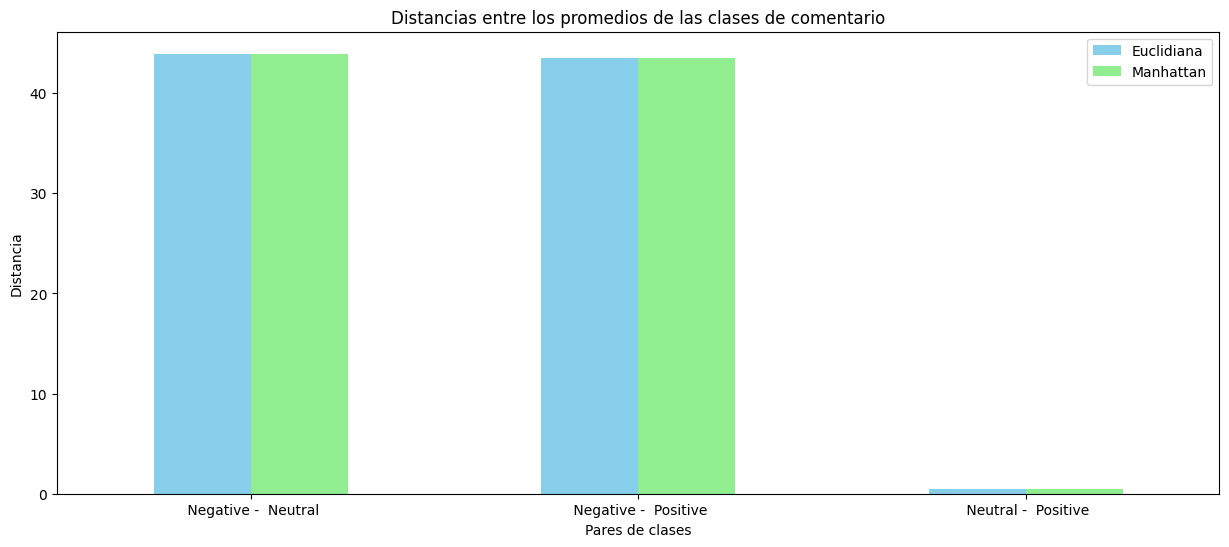

In [ ]:
# Crear un DataFrame con las distancias
distancias_df = pd.DataFrame(distancias, index=[f" {sp1} -  {sp2}" for sp1, sp2 in class_pairs])
print("\nDistancias entre los promedios de los sentimientos de los comentarios:")
# print(distancias_df)

# Graficar las distancias de los comentarios positivos, negativos y neutrales
distancias_df.plot(kind='bar', figsize=(15, 6), color=['skyblue', 'lightgreen'])
plt.title("Distancias entre los promedios de las clases de comentario")
plt.ylabel("Distancia")
plt.xlabel("Pares de clases")
plt.xticks(rotation=0)
plt.show()

3.8 grafica tipo count plot para sentimientos en comentarios

Text(0.5, 1.0, 'conteo de numero de comentario por categoria de sentimento')

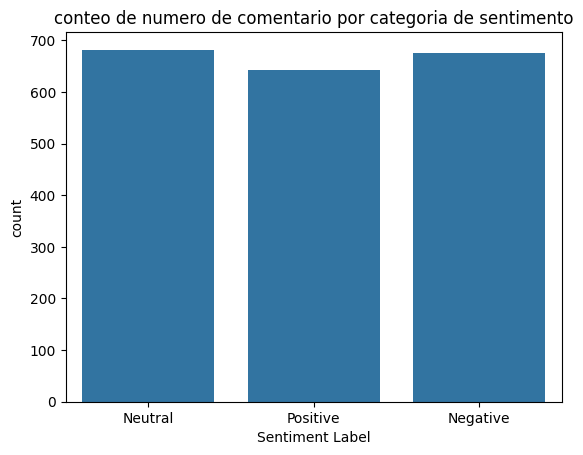

In [ ]:
# se usa la grafica countplot de sns para que grafique la cantidad de comentarios neutrales, positivos y negativos que hay en el data set general.

sns.countplot(data=df,x=df['Sentiment Label'])
plt.title("conteo de numero de comentario por categoria de sentimento")


Text(0.5, 1.0, 'conteo de numero de comentario por categoria de contenido')

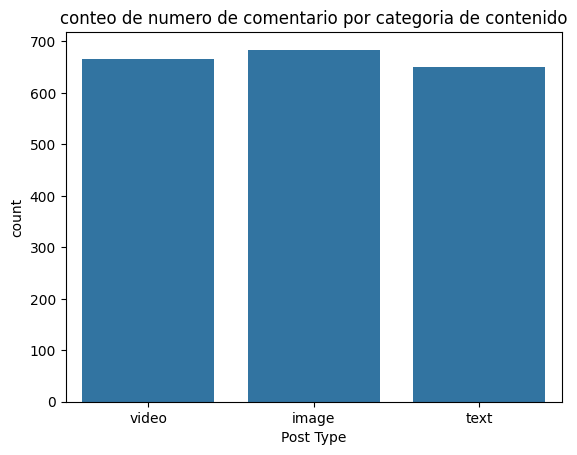

In [ ]:
# se usa la grafica countplot de sns para que grafique la cantidad de posts de video, imagenes y texto que hay en el data set general.

sns.countplot(data=df,x=df['Post Type'])
plt.title("conteo de numero de comentario por categoria de contenido")

4. analisis y procesamiento del texto

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# se importa librerias para poder tokenizar el texto y remover stopwords del texto para que sea mas facil clasificar y lematizar

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Descargar 'punkt', un paquete necesario para la tokenización de texto.
nltk.download('punkt')

# Descargar las stopwords (palabras vacías) para el idioma inglés.
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

4.1 identificacion de las palabras, conteo y graficar la frecuencia de las mas repetidas

In [ ]:
# se crea una copia del data set general.

all_data = df.copy()

In [ ]:
# se divide el data set en dos partes que se usaran para test y entrenamiento

dataset_mitad = all_data.sample(frac=0.8, random_state=1)
segunda_mitad = all_data.drop(dataset_mitad.index)

In [ ]:
# se especifica que se usara la version del idioma ingles de spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Función para procesar y limpiar los nombres utilizando spaCy para tokenizarlos
def process_names(name):
	doc = nlp(name)
	tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]
  #print(tokens)
	return tokens

In [ ]:
# Aplicar la función a cada nombre y combinar los tokens en una lista
all_data['Name_Tokens'] = all_data['Post Content'].apply(process_names) #Dentro

all_tokens = [token for name_tokens in all_data['Name_Tokens'] for token in name_tokens]

In [ ]:
# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)

In [ ]:
# Seleccionar las palabras más comunes
common_words = word_freq.most_common(15) #Seleccione el número de las palabras comunes: se recomienda 20, para ver los nombres mas reptidos segun su frecuencia.

In [ ]:
# elimina es primer valor de common_words por que este correspondia al espacio en blanco
common_words.pop(0)

('\n', 3112)

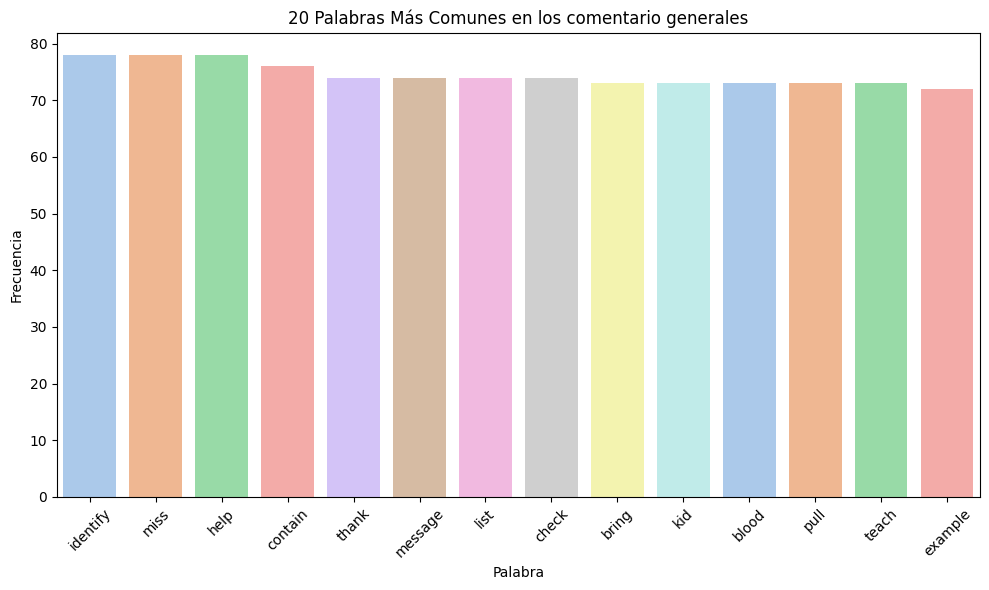

In [ ]:
# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')
plt.title('20 Palabras Más Comunes en los comentario generales')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# importa las librerias para poder calcular la regresion lineal y calcular los coeficientes del modelo

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

5. creacion de modelos de prediccion

In [ ]:
# se muestra las columnas del conjunto nuevo_set
nuevo_set.head()

,Number of Likes,Number of Comments,Number of Shares,User Follower Count
0,157,64,243,4921
1,166,121,49,612
2,185,179,224,9441
3,851,39,369,6251
4,709,52,356,1285


5.1 predicion por medio de regresion logistica

In [ ]:
#se crea una variable llamada X que sera las variables independientes y la varariable dependiente. en esta parte no importa mucho cual escojamos debido a los bajos valores de la matriz de correlacion

X = nuevo_set.values  # Variables independientes
y = nuevo_set['Number of Likes'].values                               # Variable dependiente

In [ ]:
# 3.se Crea y entrenar el modelo de regresion linieal
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# 4. Obtener los coeficientes del modelo y los imprimimos
coeficientes = model.coef_
intercepto = model.intercept_

print(f'Intercepto (b0): {intercepto}')
print('Coeficientes:')
print(f'Pclass: {coeficientes[0]}')
print(f'Age: {coeficientes[1]}')
print(f'SibSp: {coeficientes[2]}')
print(f'Parch: {coeficientes[3]}')

Intercepto (b0): 2.2737367544323206e-13
Coeficientes:
Pclass: 0.9999999999999992
Age: -7.554190319350479e-17
SibSp: -1.1140687193582003e-18
Parch: 3.754161630034785e-17


In [ ]:
# 5. Evaluación del modelo
# Hacer predicciones
y_pred = model.predict(X)

In [ ]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 6.43328317245441e-26


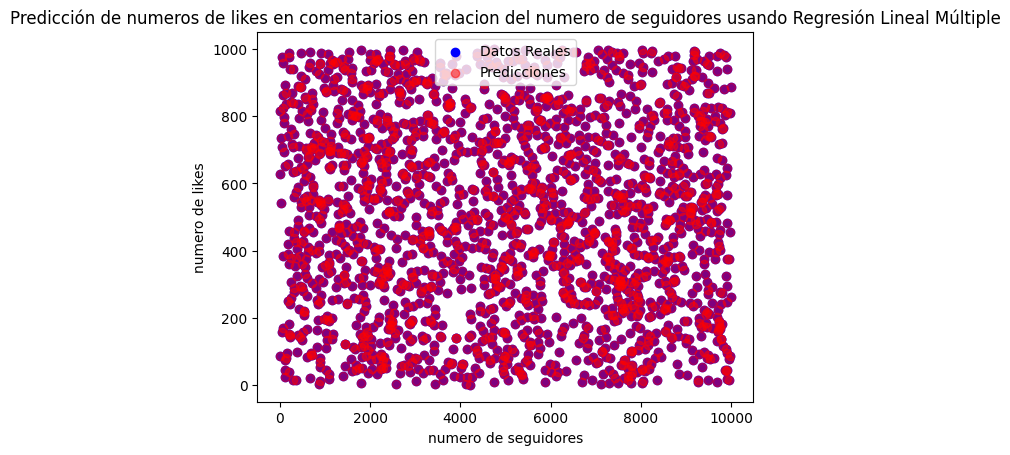

In [ ]:
# 6. Visualización
# Gráfico de dispersión de la relación entre Age y Fare
#plt.figure(figsize=(10, 6))

plt.scatter(df['User Follower Count'], y, color='blue', label='Datos Reales')
plt.scatter(df['User Follower Count'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('numero de seguidores')
plt.ylabel('numero de likes')
plt.title('Predicción de numeros de likes en comentarios en relacion del numero de seguidores usando Regresión Lineal Múltiple')
plt.legend()
plt.show()

In [ ]:
#se generan tres data sets los cuales tendran los datos tipo int 64. para los comentarios negativos, neutrales y positivos

set_positivo = datos_positivos[['Number of Likes','Number of Comments','Number of Shares','User Follower Count']]
set_negativo = datos_negativos[['Number of Likes','Number of Comments','Number of Shares','User Follower Count']]
set_neutral = datos_neutrales[['Number of Likes','Number of Comments','Number of Shares','User Follower Count']]

# luego se muestran las columnas de estos nuevos datasets

In [ ]:
set_positivo.head()

,Number of Likes,Number of Comments,Number of Shares,User Follower Count
1,166,121,49,612
2,185,179,224,9441
5,789,177,231,916
6,639,175,163,5478
7,828,161,34,5700


In [ ]:
set_negativo.head()

,Number of Likes,Number of Comments,Number of Shares,User Follower Count
4,709,52,356,1285
15,692,69,175,886
30,988,127,218,9750
32,803,155,236,8269
34,925,199,408,3638


In [ ]:
set_neutral.head()

,Number of Likes,Number of Comments,Number of Shares,User Follower Count
0,157,64,243,4921
3,851,39,369,6251
8,924,2,153,7115
10,738,107,414,1974
11,448,169,363,3714


In [ ]:
# se genera dos sets para definir una variable dependiente y otra independiente con los datos de comentarios positivos
X_positivo = set_positivo[['Number of Comments','Number of Shares','User Follower Count']].values  # Variables independientes
y_positivo = set_positivo['Number of Likes'].values                               # Variable dependiente

In [ ]:
# 3. Crear y entrenar el modelo de regresion linieal
model = LinearRegression()
model.fit(X_positivo, y_positivo)

LinearRegression()

In [ ]:
# 4. Obtener los coeficientes del modelo

# se almacena el valor del coeficiente en la variable correspondiente a este modelo para luego imprimirla
coeficientes = model.coef_

intercepto = model.intercept_
# se imprime los resultados de los coeficientes del modelo

print(f'Intercepto (b0): {intercepto}')
print('Coeficientes:')
print(f'comments: {coeficientes[0]}')
print(f'shares: {coeficientes[1]}')
print(f'follower: {coeficientes[2]}')


Intercepto (b0): 520.1828914149672
Coeficientes:
comments: -0.015401531283776908
shares: 0.02302504728208453
follower: -0.00728724543855554


In [ ]:
# 5. Evaluación del modelo
# Hacer predicciones


y_pred = model.predict(X_positivo)


In [ ]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_positivo, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 82940.1100303942


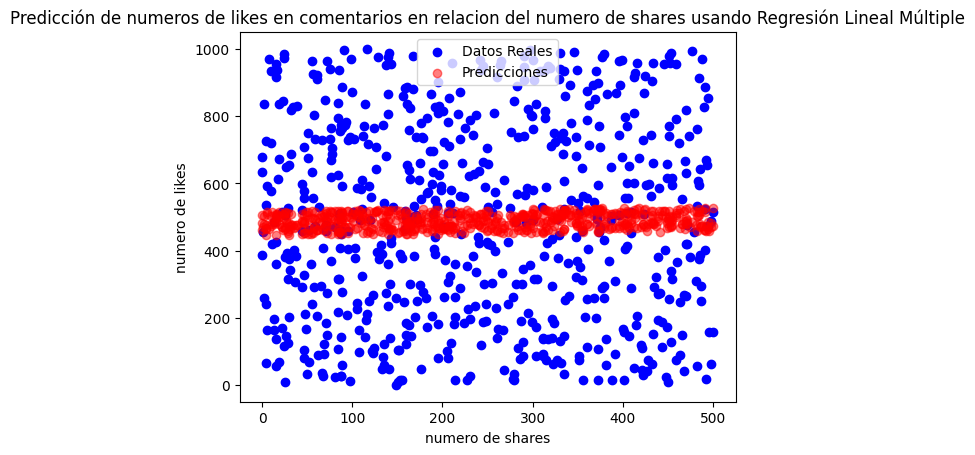

In [ ]:
# 6. Visualización
# Gráfico de dispersión de la relación entre Age y Fare


plt.scatter(set_positivo['Number of Shares'], y_positivo, color='blue', label='Datos Reales')
plt.scatter(set_positivo['Number of Shares'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('numero de shares')
plt.ylabel('numero de likes')
plt.title('Predicción de numeros de likes en comentarios en relacion del numero de shares usando Regresión Lineal Múltiple')
plt.legend()
plt.show()

5.2 creacion de modelos de prediccion de naivebayes

In [ ]:
# se crean data sets que contendran solo el comentario y la label correspondiente para entrenamiento

data_corto = df[['Post Content','Sentiment Label']]

In [ ]:
# se muestra las columnas del nuevo set
data_corto.head()

,Post Content,Sentiment Label
0,Word who nor center everything better politica...,Neutral
1,Begin administration population good president...,Positive
2,Thousand total sign. Agree product relationshi...,Positive
3,Individual from news third. Oil forget them di...,Neutral
4,Time adult letter see reduce. Attention sudden...,Negative


In [ ]:
# se crear un set para entrenamiento, un set para realizar tokenizacion y un set para realizar el test de entrenamiento

train_mas_corto = data_corto[50:550]
copia_train_mas_corto = train_mas_corto
set_for_test = data_corto[551:1000]

In [ ]:
# se muestran las columnas de los sets recien creados
train_mas_corto.head()

,Post Content,Sentiment Label
50,Consider area machine. Able ball single view c...,Neutral
51,Next myself strategy special state left friend...,Negative
52,Physical take trade avoid. Training sell drug ...,Positive
53,Into theory stop energy bar big officer letter...,Neutral
54,Tonight reach short like her mission recent. O...,Negative


In [ ]:
set_for_test.head()

,Post Content,Sentiment Label
551,Writer under wide plan her simply Democrat. Id...,Neutral
552,Politics amount about arrive run hour. Commerc...,Neutral
553,Its term drug finally bad budget get others. B...,Neutral
554,Determine fall structure watch. Under audience...,Neutral
555,Present avoid Mr sometimes. Meet community gre...,Neutral


In [ ]:
# instala las librerias para poder analizar el texto y clasificarlo

!pip install -U texblob
!python -m textblob.download_corpora

ERROR: Could not find a version that satisfies the requirement texblob (from versions: none)
ERROR: No matching distribution found for texblob
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob.classifiers import NaiveBayesClassifier

In [ ]:
# se convierten los data sets de entrenamiento y test a listas
list_train = train_mas_corto.values.tolist()
list_test = set_for_test.values.tolist()

In [ ]:
# se aplica el modelo de aprendizaje supervisado de naive bayes con la lista de entrenamiento
cl = NaiveBayesClassifier(list_train)

# se aplica el modelo de entrenamiento a un elemento de la lista de testeo y luego se imprime el resultado y el valor esperado para poder compararlos y saber si fue exitoso
result = cl.classify(list_test[3][0])
print(list_test[3][0])
print(list_test[3][1])
print(result)

Determine fall structure watch. Under audience level remember we begin according.
Tax scene paper floor including charge study. Today exist hard. Arrive question security hard open concern.
Neutral
Neutral


In [ ]:
# se imprime el valor de la presicion del modelo recien entrenado
cl.accuracy(list_test)

0.33407572383073497

In [ ]:
# muestra las caracteristicas mas importantes y revisa si esta presente
cl.show_informative_features(5)

Most Informative Features
        contains(inside) = True           Negati : Positi =      8.3 : 1.0
         contains(right) = True           Neutra : Positi =      8.3 : 1.0
         contains(whose) = True           Neutra : Positi =      8.3 : 1.0
      contains(physical) = True           Negati : Positi =      7.5 : 1.0
      contains(specific) = True           Negati : Positi =      7.5 : 1.0


5.3 tokenizacion lematizacion del texto

In [ ]:
# se importan las librerias para tokenizar y lematizar la columna de comentarios
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# se descarga los modulos necesarios
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# se aplica el lematizador de palabras
lemmatizer = WordNetLemmatizer()

In [ ]:
# se crea una columna en la que se tokeniza la columna de comentarios y tambien se crea una columna con los comentarios lematizado

train_mas_corto['tokenized_review'] = train_mas_corto['Post Content'].apply(word_tokenize)
train_mas_corto['lematized_review'] = train_mas_corto['tokenized_review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
# data['tokenized_review'] = data['tokenized_review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
train_mas_corto.head(10)

,Post Content,Sentiment Label,tokenized_review,lematized_review
50,Consider area machine. Able ball single view c...,Neutral,"[Consider, area, machine, ., Able, ball, singl...","[Consider, area, machine, ., Able, ball, singl..."
51,Next myself strategy special state left friend...,Negative,"[Next, myself, strategy, special, state, left,...","[Next, myself, strategy, special, state, left,..."
52,Physical take trade avoid. Training sell drug ...,Positive,"[Physical, take, trade, avoid, ., Training, se...","[Physical, take, trade, avoid, ., Training, se..."
53,Into theory stop energy bar big officer letter...,Neutral,"[Into, theory, stop, energy, bar, big, officer...","[Into, theory, stop, energy, bar, big, officer..."
54,Tonight reach short like her mission recent. O...,Negative,"[Tonight, reach, short, like, her, mission, re...","[Tonight, reach, short, like, her, mission, re..."
55,Feel possible ground get from these assume. Th...,Neutral,"[Feel, possible, ground, get, from, these, ass...","[Feel, possible, ground, get, from, these, ass..."
56,Democratic meet executive part teach very two....,Positive,"[Democratic, meet, executive, part, teach, ver...","[Democratic, meet, executive, part, teach, ver..."
57,Race or myself total within outside class stud...,Negative,"[Race, or, myself, total, within, outside, cla...","[Race, or, myself, total, within, outside, cla..."
58,Sometimes smile can war. Executive woman usual...,Positive,"[Sometimes, smile, can, war, ., Executive, wom...","[Sometimes, smile, can, war, ., Executive, wom..."
59,Customer three despite. Television whose want ...,Neutral,"[Customer, three, despite, ., Television, whos...","[Customer, three, despite, ., Television, whos..."


In [ ]:
# se muestran los comentarios correspondientes a cada categoria
Chemistry_comments = train_mas_corto[train_mas_corto['Sentiment Label'] == 'Positive']['lematized_review']
Physics_comments = train_mas_corto[train_mas_corto['Sentiment Label'] == 'Negative']['lematized_review']
Biology_comments = train_mas_corto[train_mas_corto['Sentiment Label'] == 'Neutral']['lematized_review']
print(Chemistry_comments, Physics_comments, Biology_comments, )

52     [Physical, take, trade, avoid, ., Training, se...
56     [Democratic, meet, executive, part, teach, ver...
58     [Sometimes, smile, can, war, ., Executive, wom...
65     [Second, end, manage, explain, catch, ., Capit...
67     [Good, eye, everybody, score, improve, admit, ...
                             ...                        
532    [Fall, place, mother, population, explain, for...
533    [Unit, land, event, assume, account, hospital,...
542    [Watch, happy, traditional, ., Side, several, ...
545    [Future, tend, at, le, part, appear, across, ....
547    [Sit, five, stop, actually, ., Hold, hold, wor...
Name: lematized_review, Length: 181, dtype: object 51     [Next, myself, strategy, special, state, left,...
54     [Tonight, reach, short, like, her, mission, re...
57     [Race, or, myself, total, within, outside, cla...
60     [Politics, office, ground, author, campaign, p...
63     [Half, live, night, trouble, ., Civil, million...
                             ...     

5.4 eliminar stopwords de los comentarios

In [ ]:
# importa las librerias para filtar las stop words de los comentarios originales
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# se define el lenguaje de las stopwords que tiene que detectar. y en el ciclo landa se recorre la columna y se crea una nueva columna sin stopwords
stop_words = stopwords.words('english')
copia_train_mas_corto['comment no stopwords'] = copia_train_mas_corto['Post Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
# se muestra las columnas del nuevo set, con la columna sin stop words
copia_train_mas_corto.head()

,Post Content,Sentiment Label,tokenized_review,lematized_review,comment no stopwords
50,Consider area machine. Able ball single view c...,Neutral,"[Consider, area, machine, ., Able, ball, singl...","[Consider, area, machine, ., Able, ball, singl...",Consider area machine. Able ball single view c...
51,Next myself strategy special state left friend...,Negative,"[Next, myself, strategy, special, state, left,...","[Next, myself, strategy, special, state, left,...",Next strategy special state left friend. Relat...
52,Physical take trade avoid. Training sell drug ...,Positive,"[Physical, take, trade, avoid, ., Training, se...","[Physical, take, trade, avoid, ., Training, se...",Physical take trade avoid. Training sell drug ...
53,Into theory stop energy bar big officer letter...,Neutral,"[Into, theory, stop, energy, bar, big, officer...","[Into, theory, stop, energy, bar, big, officer...",Into theory stop energy bar big officer letter...
54,Tonight reach short like her mission recent. O...,Negative,"[Tonight, reach, short, like, her, mission, re...","[Tonight, reach, short, like, her, mission, re...",Tonight reach short like mission recent. Only ...


5.5 clasificacion de naivebayes sin stopwords

In [ ]:
set_sin_stopwords = copia_train_mas_corto[['comment no stopwords','Sentiment Label']]

In [ ]:
set_sin_stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 50 to 549
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   comment no stopwords  500 non-null    object
 1   Sentiment Label       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
sin_stops_corto = data_corto[50:550]
sin_stops_sec= data_corto[551:1000]

In [ ]:
list_train2 = sin_stops_corto.values.tolist()
list_test2 = sin_stops_sec.values.tolist()

In [ ]:
cl2 = NaiveBayesClassifier(list_train2)

result = cl2.classify(list_test2[3][0])
print(list_test[3][0])
print(list_test[3][1])
print(result)

Determine fall structure watch. Under audience level remember we begin according.
Tax scene paper floor including charge study. Today exist hard. Arrive question security hard open concern.
Neutral
Neutral


In [ ]:
cl2.accuracy(list_test)

0.33407572383073497

In [ ]:
# Load the datasets
train_df = pd.read_csv('drive/MyDrive/Train_sen.csv')
test_df = pd.read_csv('drive/MyDrive/Test_sen.csv')

In [ ]:
# Display the first few rows of the training dataset
train_df.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,NaN,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral


In [ ]:
# Display the first few rows of the test dataset
test_df.head()

,Id,Body
0,1,rule 2 no metes about polarizing political top...
1,2,NaN
2,3,no politics danger now i can make a propaganda...
3,4,i am the senate gets stabbed
4,5,is this a suicide


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2000 non-null   int64 
 1   Body            1772 non-null   object
 2   Sentiment Type  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      2000 non-null   int64 
 1   Body    1772 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
# Check for missing values in the training and test datasets
train_df.isnull().sum()

,0
Id,0
Body,228
Sentiment Type,0


In [ ]:
test_df.isnull().sum()

,0
Id,0
Body,228


In [ ]:
# Drop rows with missing values in the training dataset
train_df.dropna(subset=['Body', 'Sentiment Type'], inplace=True)
# Fill missing values in the test dataset with an empty string
test_df['Body'].fillna('', inplace=True)

5.6.metodos de clasificacion alternativos

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['Body'], train_df['Sentiment Type'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(test_df['Body'])

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the validation set
y_val_pred = model.predict(X_val_tfidf)

In [ ]:
# Calculate the accuracy of the model (el valor es mejor que la precision de la regresion logistica, pero seria adecuado que fuera un poco mayor)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.68


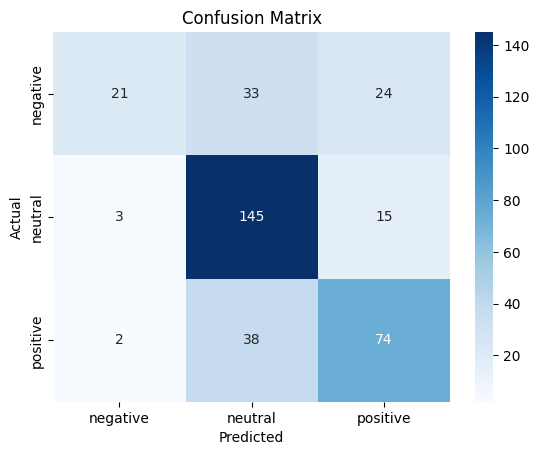

In [ ]:
# grafica de confusion matrix para conocer el rendimiento del entrenamiento del modelo de clasificacion
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display the classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

    negative       0.81      0.27      0.40        78
     neutral       0.67      0.89      0.77       163
    positive       0.65      0.65      0.65       114

    accuracy                           0.68       355
   macro avg       0.71      0.60      0.61       355
weighted avg       0.70      0.68      0.65       355



In [ ]:
# Predict on the test set
test_df['Sentiment Type'] = model.predict(X_test_tfidf)

In [ ]:
# Display the first few rows of the test dataset with predictions
test_df.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral
